In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_datareader as pdr
from datetime import datetime
% matplotlib inline

In [13]:
start = datetime(2015, 9, 20)
alibaba = pdr.get_data_yahoo('BABA', start=start)
amazon = pdr.get_data_yahoo('AMZN', start=start)

In [14]:
alibaba.to_excel('/Users/monstar/Desktop/alibaba.xlsx')
amazon.to_excel('/Users/monstar/Desktop/amazon.xlsx')

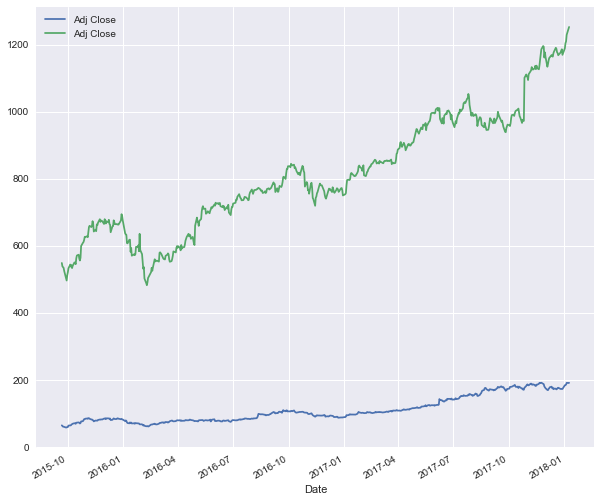

In [30]:
sns.set()
plt.figure(figsize=(10, 9))
alibaba['Adj Close'].plot(legend=True)
amazon['Adj Close'].plot(legend=True)

In [32]:
alibaba.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-09-21,65.379997,66.400002,62.959999,63.900002,63.900002,22355100
2015-09-22,62.939999,63.270000,61.580002,61.900002,61.900002,14897900
2015-09-23,61.959999,62.299999,59.680000,60.000000,60.000000,22684600
2015-09-24,59.419998,60.340000,58.209999,59.919998,59.919998,20645700
2015-09-25,60.630001,60.840000,58.919998,59.240002,59.240002,17009100


In [35]:
alibaba['high-low'] = alibaba['High'] - alibaba['Low']
alibaba.head()

,Open,High,Low,Close,Adj Close,Volume,high-low
Date,,,,,,,
2015-09-21,65.379997,66.400002,62.959999,63.900002,63.900002,22355100,3.440003
2015-09-22,62.939999,63.270000,61.580002,61.900002,61.900002,14897900,1.689998
2015-09-23,61.959999,62.299999,59.680000,60.000000,60.000000,22684600,2.619999
2015-09-24,59.419998,60.340000,58.209999,59.919998,59.919998,20645700,2.130001
2015-09-25,60.630001,60.840000,58.919998,59.240002,59.240002,17009100,1.920002


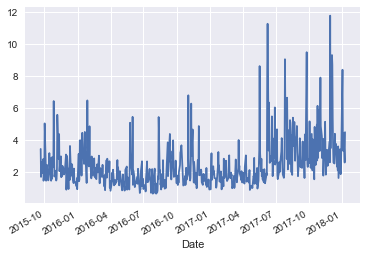

In [37]:
alibaba['high-low'].plot()

In [38]:
company = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB']
company_quote_df = pdr.get_data_yahoo(company, start=start)

In [48]:
top_tech_df = company_quote_df['Adj Close']
top_tech_df.head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2018-01-09,174.330002,1252.699951,187.869995,1106.260010,88.220001
2018-01-08,174.350006,1246.869995,188.279999,1106.939941,88.279999
2018-01-05,175.000000,1229.140015,186.850006,1102.229980,88.190002
2018-01-04,173.029999,1209.589966,184.330002,1086.400024,87.110001
2018-01-03,172.229996,1204.199951,184.669998,1082.479980,86.349998


In [51]:
top_tech_dr = top_tech_df.pct_change()
top_tech_dr.dropna().head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2018-01-08,0.000115,-0.004654,0.002182,0.000615,0.000680
2018-01-05,0.003728,-0.014220,-0.007595,-0.004255,-0.001019
2018-01-04,-0.011257,-0.015905,-0.013487,-0.014362,-0.012246
2018-01-03,-0.004623,-0.004456,0.001844,-0.003608,-0.008725
2018-01-02,0.000174,-0.012614,-0.017599,-0.016148,-0.004632


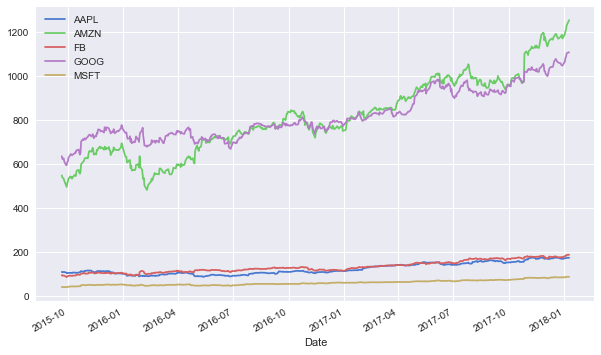

In [64]:
sns.set_palette(sns.color_palette('muted'))
top_tech_df.plot(figsize=(10,6))

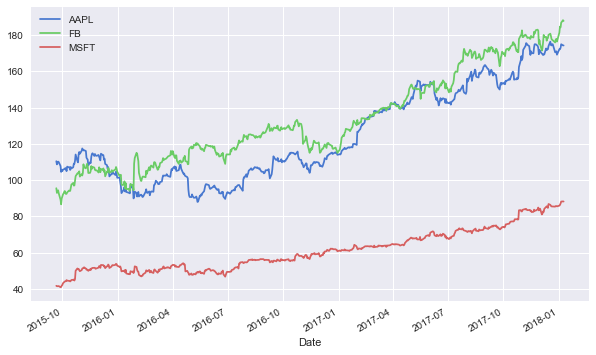

In [65]:
top_tech_df[['AAPL', 'FB', 'MSFT']].plot(figsize=(10,6))

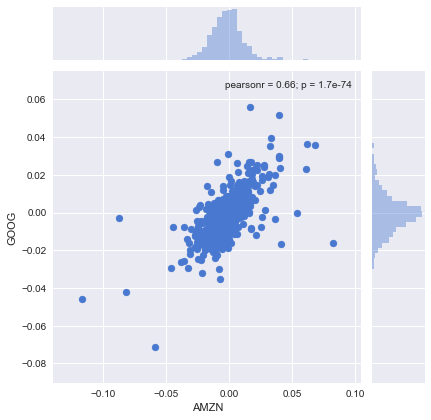

In [68]:
sns.jointplot('AMZN','GOOG', top_tech_dr, kind='scatter')

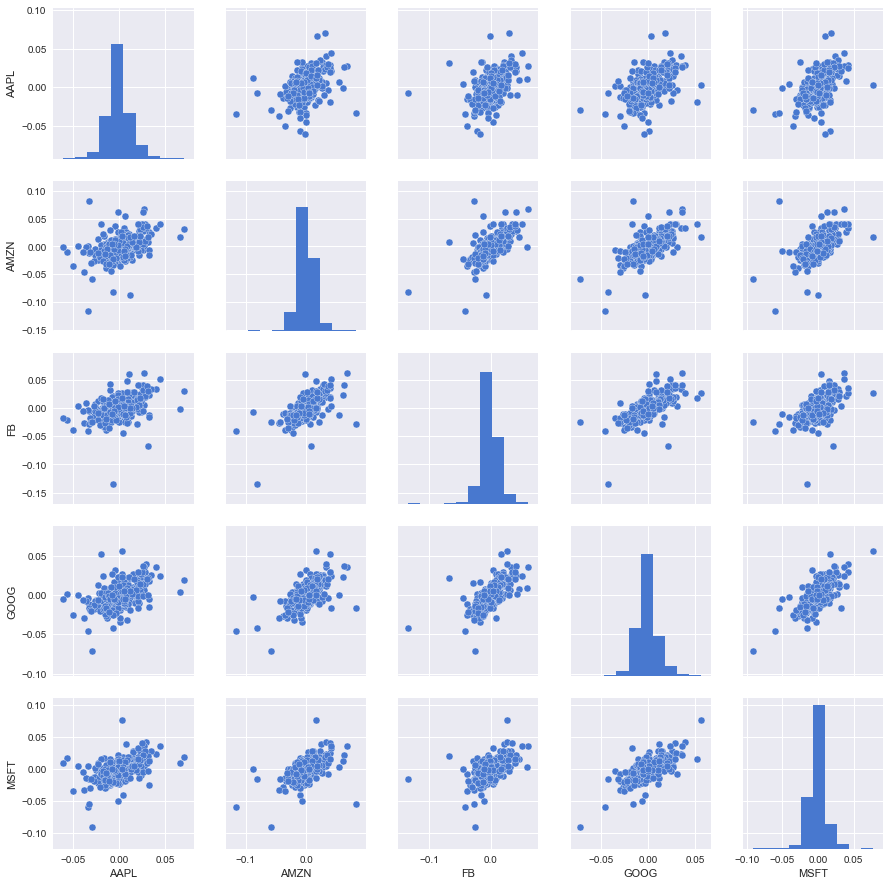

In [81]:
sns.pairplot(top_tech_dr.dropna())

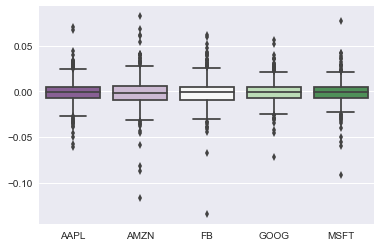

In [94]:
# top_tech_dr.dropna().head()
sns.boxplot(data=top_tech_dr, palette="PRGn")

In [1]:
import tushare as ts
ts_res = ts.get_stock_basics()

In [7]:
ts_res.loc['002024']

name                       苏宁易购
industry                   电器连锁
area                         江苏
pe                       133.16
outstanding               49.87
totals                     93.1
totalAssets         1.56026e+07
liquidAssets        8.39172e+06
fixedAssets         1.44905e+06
reserved            3.62839e+06
reservedPerShare            3.9
esp                       0.072
bvps                        8.6
pb                         1.49
timeToMarket        2.00407e+07
undp                1.65535e+06
perundp                    1.78
rev                       26.98
profit                   321.23
gpr                       13.91
npr                        0.51
holders                  348194
Name: 002024, dtype: object

In [8]:
ts_today = ts.get_today_all()

[Getting data:]############################################################

In [20]:
# ts_today[ts_today.code.isin(['002024'])]
# 设置中文字体

# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# plt.rcParams['axes.unicode_minus'] = False
ts.get_today_ticks('002024').T

[Getting data:]#################################################

,0,1,2,3,4,5,6,7,8,9,...,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985
time,13:56:03,13:56:00,13:55:57,13:55:54,13:55:48,13:55:45,13:55:42,13:55:36,13:55:33,13:55:30,...,09:30:24,09:30:21,09:30:18,09:30:15,09:30:09,09:30:06,09:30:03,09:30:00,09:25:03,09:25:03
price,12.79,12.79,12.79,12.79,12.79,12.79,12.78,12.79,12.79,12.79,...,12.84,12.84,12.85,12.86,12.84,12.85,12.84,12.83,12.83,12.83
pchange,-0.16,-0.16,-0.16,-0.16,-0.16,-0.16,-0.23,-0.16,-0.16,-0.16,...,+0.23,+0.23,+0.31,+0.39,+0.23,+0.31,+0.23,+0.16,+0.16,+0.16
change,0,0,0,0,0,0.01,-0.01,0,0,0,...,0,-0.01,-0.01,0.02,-0.01,0.01,0.01,0,0,0
volume,21,87,74,60,20,80,12,2,57,9,...,36,522,5,20,72,513,3378,0,1239,1239
amount,26859,111273,94646,76740,25580,102320,15336,2558,72903,11511,...,46224,670466,6425,25720,93501,659218,4338623,0,1589650,1589650
type,买盘,买盘,买盘,买盘,买盘,买盘,卖盘,买盘,买盘,买盘,...,买盘,卖盘,卖盘,买盘,卖盘,买盘,买盘,卖盘,中性盘,0


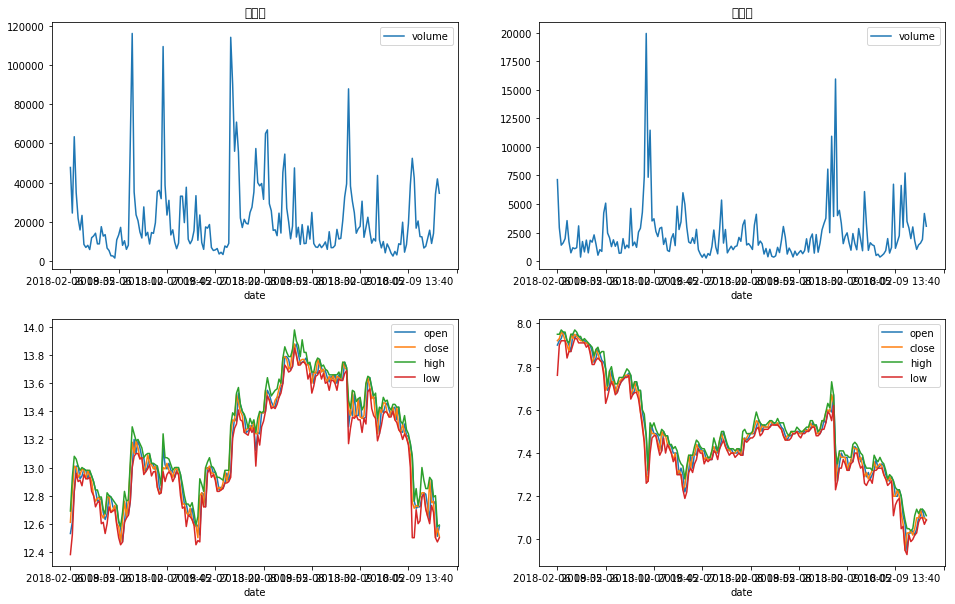

In [4]:
figure, ax = plt.subplots(2, 2)
ts_5 = ts.get_k_data('600460', ktype='5').set_index('date')
ts_5 = ts_5[ts_5.index > '2018-02-06'].sort_index(ascending=True)
pd.DataFrame(ts_5, columns=['volume']).plot(figsize=(16,10), ax=ax[0][0], title='士兰微')
pd.DataFrame(ts_5, columns=['open', 'close', 'high', 'low']).plot(ax=ax[1][0])

ts_5_xhd = ts.get_k_data('002264', ktype='5').set_index('date')
ts_5_xhd = ts_5_xhd[ts_5_xhd.index > '2018-02-06'].sort_index(ascending=True)
pd.DataFrame(ts_5_xhd, columns=['volume']).plot(figsize=(16,10), ax=ax[0][1], title='新华都')
pd.DataFrame(ts_5_xhd, columns=['open', 'close', 'high', 'low']).plot(ax=ax[1][1])

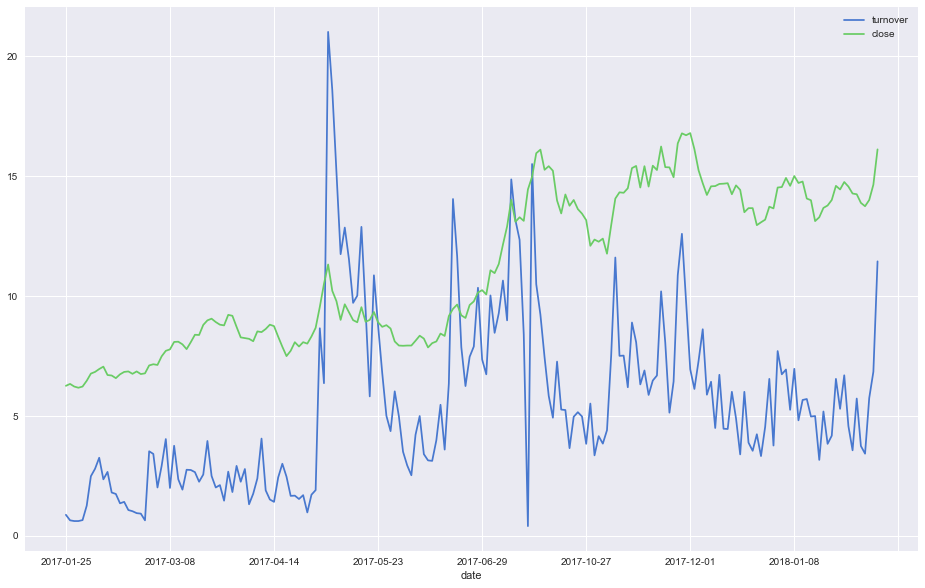

In [42]:
sns.set()
sns.set_palette(sns.color_palette('muted'))
ts_hist = pd.DataFrame(ts.get_hist_data('600581',start='2017-01-25',end='2018-02-05'), columns=['turnover', 'close'])
ts_hist.sort_index().plot(figsize=(16, 10))

In [5]:
ts_fc = ts.forecast_data(2017,4)

[Getting data:]#######################################################

In [13]:
cj_df = pd.read_clipboard()

In [23]:
cj_df_1 = pd.read_clipboard()

In [30]:
cj_df['抛出价格'][0] = 5.8
res_cj_df = pd.concat([cj_df, cj_df_1]).reset_index()

/Users/monstar/Envs/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
# def getRange(item):
#     return pd.Series([round((item['抛出价格'] - item['建仓价格']) / item['建仓价格'] * 100, 3)])
# cj_range_df = cj_df.apply(getRange)
# pd.concat([cj_df, cj_range_df], axis = 1)
pd.concat([res_cj_df, pd.Series([round((x - y) / x * 100, 0) for x, y in tuple(zip(res_cj_df['抛出价格'].values, res_cj_df['建仓价格'].values))])], axis=1)

/Users/monstar/Envs/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


,index,股票名称+代码,建仓日期＋时间,建仓价格,抛出日期＋时间,抛出价格,0
0,0,两面针(600249),03月13日(14:27分),5.80,03月13日(00:00分),5.80,0.000000
1,1,国投中鲁(600962),03月12日(14:03分),8.72,03月13日(10:00分),9.59,9.000000
2,2,三峡新材(600293),03月09日(10:37分),7.53,03月12日(09:35分),8.25,9.000000
3,3,威尔泰(002058),03月08日(14:21分),17.70,03月09日(10:00分),19.82,11.000000
4,4,蓝丰生化(002513),03月07日(13:56分),9.40,03月08日(10:00分),10.43,10.000000
5,5,联明股份(603006),03月06日(14:14分),12.85,03月07日(10:00分),14.27,10.000000
6,6,炬华科技(300360),03月05日(14:25分),9.08,03月06日(10:30分),10.03,9.000000
7,7,东方新星(002755),03月02日(14:36分),23.99,03月05日(09:32分),26.38,9.000000
8,8,东方中科(002819),03月01日(13:39分),25.30,03月02日(09:55分),28.32,11.000000
9,9,溢多利(300381),02月28日(13:37分),10.53,03月01日(14:39分),11.81,11.000000
